# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campagn,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [2]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [3]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


# A. Data Preparation and Exploration

**2. Inspect the data**

**Analyzing the variables** 
- There are 23 variables (columns)
 

- Missing values and more information: 

In [4]:
### Taking a summary of the categocal columns alone
data.describe(include = 'object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [5]:
#This function provides a quick access to a single summary statistic of a column variable
# the column type to be specified could be: object or np.number
# Possible values of stat_name for val = np.number are: 'count', 'mean', 'std', 'min',
#'25%', '50%', '75%', 'max', unique, top, freq

def individual_summary_col (obj, stat_name, col):
    get_index = data.describe(include = obj).index
    my_id = []
    for idx in get_index:
        my_id.append(idx)
    
    ii = my_id.index(stat_name) 
           
    return  data.describe(include = obj).loc[[stat_name],[col]]

individual_summary_col (object, 'top', 'Customer Name') # A function taking 3 arguments 
                                                        # Can be used to identify top 
                                                        # columns e.g. customers, top products 
                                                        # in terms of their numbers, frequently used 
                                                        # shiping mode, highest order priority used
                                                        # highest product sold, etc.
                                                        # THE function can also be used to determine
                                                        # max, min, mean, std of sales, profits, 
                                                        # quantity, unit price, quantity, etc

new_data_country = data.copy()
new_data_country.set_index('Country',inplace = True)  # set country as key


In [6]:
data[data['Profit'] == -6599.978000][['Market', 'Category', 'Country']] # Analysis on lowest profit

,Market,Category,Country
43453,US,Technology,United States



# Data Cleaning

**Finding missing values**

In [7]:
# Number of missing values in each column
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

# Dealing with missing values
Replacing missing values

# Transforming variables and table
- Dates

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

weeks_ship = data['Ship Date'].dt.day_name()
months_order = data['Order Date'].dt.month_name()
months_ship = data['Ship Date'].dt.month_name()
years_order = data['Order Date'].dt.year
years_ship = data['Ship Date'].dt.year

data['Ship Weekday'] = weeks_ship
data['Order Date_M'] = months_order
data['Ship Date_M'] = months_ship
data['Order Date_Y'] = years_order
data['Ship Date_Y'] = years_ship



- **Date Difference**

In [9]:
cust_leadtime = data['Ship Date'] - data['Order Date'] # Determine the customer lead time by subtracting
                                                       # Order date from shipping date

In [10]:
data['Lead Time'] = cust_leadtime    # customer lead time is added to the data frame of 'data'

In [11]:
# Converting the leadtime into integers

leadtime_array = list(np.array(data['Lead Time']))

empty_list = []

for i_d in range (51290):
    val = leadtime_array[i_d].astype('timedelta64[D]')/np.timedelta64(1, 'D')

    empty_list.append(val)

    
    
leadtime_int = np.array(empty_list).astype(int) # turns lead time values from list to array. 
                                                # Proceed to change it from float to int

data['Lead Time_Int'] = leadtime_int # Add leadtime, in integers, to original 'data' 

#### Adding Cost,  Unit Cost

In [12]:
data['Cost'] = data['Sales'] - data['Profit']
data['Unit Cost'] = data['Cost']/data['Quantity']

In [13]:
#data[data['Lead Time_Int'] < 0]# Transactions with negative lead time

In [14]:
data[['Unit Cost', 'Category', 'Profit', 'Sales']].groupby('Category').mean().sort_values('Unit Cost')

,Unit Cost,Profit,Sales
Category,,,
Office Supplies,30.694515,16.578961,121.097120
Furniture,111.734501,28.878567,416.248905
Technology,117.868095,65.454958,467.858939


In [15]:
#data[['Unit Cost', 'Category', 'Profit', 'Sales']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Ship Weekday,Order Date_M,Ship Date_M,Order Date_Y,Ship Date_Y,Lead Time,Lead Time_Int,Cost,Unit Cost
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,Wednesday,January,June,2011,2011,151 days,151,302.1600,151.0800
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,Monday,January,August,2011,2011,212 days,212,84.3300,28.1100
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,Sunday,January,May,2011,2011,120 days,120,36.4800,9.1200
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,Sunday,January,May,2011,2011,120 days,120,70.9200,23.6400
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,Monday,January,August,2011,2011,212 days,212,75.9000,15.1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,Wednesday,December,April,2014,2015,91 days,91,9.3852,4.6926
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,Friday,December,May,2014,2015,121 days,121,3.5700,3.5700
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,Sunday,December,February,2014,2015,32 days,32,14.0400,4.6800
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,Monday,December,June,2014,2015,152 days,152,6.5600,6.5600


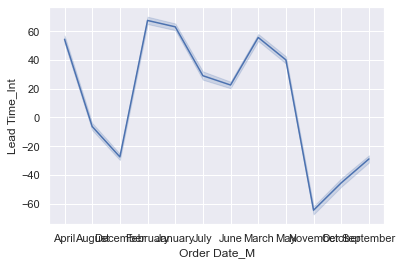

In [41]:
sns.lineplot(x=data['Order Date_M'], y=data['Lead Time_Int'])
data

# -----------------------------------------------------------------------------------------------

### Analysis on individual columns except **Postal Code** 
 - Order Date (order date in month and in years)

In [17]:
analyse_order_date = data[['Order Date', 'Order Date_M', 'Order Date_Y']]

In [18]:
analyse_order_date.describe(include = 'all')

,Order Date,Order Date_M,Order Date_Y
count,51290,51290,51290.000000
unique,1430,12,NaN
top,2014-06-18 00:00:00,November,NaN
freq,135,5660,NaN
first,2011-01-01 00:00:00,NaN,NaN
last,2014-12-31 00:00:00,NaN,NaN
mean,NaN,NaN,2012.777208
std,NaN,NaN,1.098931
min,NaN,NaN,2011.000000
25%,NaN,NaN,2012.000000


From the descriptive table:
- it can be observed that on every **November**, the company records more transactions. This could be 
as a result of people preparing for their christmas celebration. It is quiet surprising why this didn't 
occur in December. 
- 


In [19]:
reg_year = data[['Order Date_M', 'Order Date_Y']].groupby('Order Date_Y').count()#.sort_values('Order Date_M', ascending=False)
reg_year      # This shows us the number of records in each year. 

,Order Date_M
Order Date_Y,
2011,8998
2012,10962
2013,13799
2014,17531


**A ccording to the above table, we can see that the company's number of transactions is increasing year
by year**

In [20]:
reg_month = data[['Order Date_M', 'Order Date_Y']].groupby(
    'Order Date_M').count().sort_values('Order Date_Y', ascending=False)
reg_month      # This shows us the number of records in each Month, from 2011 - 2014. 

,Order Date_Y
Order Date_M,
November,5660
December,5534
September,5237
June,4892
August,4715
October,4467
May,3938
March,3728
July,3571


### Analysis on individual columns except **Postal Code** 
 - ## (a) Customer Name and ID

In [21]:
data[['Customer ID', 'Customer Name']]

,Customer ID,Customer Name
0,TB-11280,Toby Braunhardt
1,JH-15985,Joseph Holt
2,AT-735,Annie Thurman
3,EM-14140,Eugene Moren
4,JH-15985,Joseph Holt
...,...,...
51285,EB-13975,Erica Bern
51286,LP-7095,Liz Preis
51287,CM-12190,Charlotte Melton
51288,TD-20995,Tamara Dahlen


In [22]:
data[['Customer Name']].nunique() # Identifying the number of customers by name

Customer Name    795
dtype: int64

In [23]:
data[['Customer ID']].nunique() # Identifying the number of customers by ID. This gives actual 
                                # number of customers

Customer ID    1590
dtype: int64

- **There are 1590 unique customers in our system.**
- **However, There are 795 unique customer names in our**

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

#### i. Giving recommendation on identifying our top customers (by names) for christmas gifts
*This will identify top customers with similar names*

In [24]:
#This function provides a quick access to a single summary statistic of a column variable
# the column type to be specified could be: object or np.number
# Possible values of stat_name for val = np.number are: 'count', 'mean', 'std', 'min',
#'25%', '50%', '75%', 'max', unique, top, freq

def individual_summary_col (obj, stat_name, col):
    get_index = data.describe(include = obj).index
    my_id = []
    for idx in get_index:
        my_id.append(idx)
    
    ii = my_id.index(stat_name) 
           
    return  data.describe(include = obj).loc[[stat_name],[col]]

In [25]:
individual_summary_col (object, 'top', 'Customer Name') # A function taking 3 arguments 
                                                        # Can be used to identify top 
                                                        # columns e.g. customers, top products 
                                                        # in terms of their numbers, frequently used 
                                                        # shiping mode, highest order priority used
                                                        # highest product sold, etc.
                                                        # THE function can also be used to determine
                                                        # max, min, mean, std of sales, profits, 
                                                        # quantity, unit price, quantity, etc

,Customer Name
top,Muhammed Yedwab


In [26]:
new_data = data.copy()
new_data.set_index('Country',inplace = True)  # set country as key

In [27]:
# Generate the average sales to, profits from and discount given to Muhammed Yedwab, our top customer
# with highest transaction

new_data[new_data['Customer Name'] == 'Muhammed Yedwab'][['Sales', 'Profit', 'Discount']].\
groupby('Country').mean().sort_values('Sales',ascending=False)# Prioritising Muhammed Yedwab based on 
                                                                # Sales

,Sales,Profit,Discount
Country,,,
Germany,597.000500,83.315500,0.07500
Nicaragua,578.080000,136.425714,0.00000
Egypt,575.842500,145.072500,0.00000
Australia,428.933250,-14.631750,0.17500
Austria,392.190000,151.280000,0.00000
China,386.192500,52.160000,0.00000
Philippines,231.331125,-29.623875,0.37500
United States,197.747429,-17.700529,0.24381
South Africa,176.115000,45.705000,0.00000


In [28]:
country_Muhammed = new_data[new_data['Customer Name'] == 'Muhammed Yedwab'][['Sales', 'Profit', 'Discount']].\
groupby('Country').mean().sort_values('Profit',ascending=False) # Prioritising Muhammed Yedwab based on 
                                                           # profit

Able to identify top customer by name **Muhammed Yedwab** using the function: 
- individual_summary_col (object, 'top', 'Customer Name')

**Muhammed Yedwab with highest average sales comes from Germany and had an average discount of 7.5%**
**Muhammed Yedwab with lowest average sales comes from Sudan and had no discount**

**Muhammed Yedwab with highest profit comes from Austria and had no discount**
**Muhammed Yedwab with Lowest profit comes from Turkey and had an average discount of 60%**

As part of Christmas bonus, discount to Muhammed Yedwabs in Germany can be increase from 7.5% to 20% 
Besides, Muhammed Yedwabs in Austria should be given more discount since almost no discount is given to
them despite the fact that, they provide us with the highest profits. 

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

#### ii. Giving recommendation on identifying our top customers (by ID) for christmas gifts
*This will identify unique customer with a unique ID. In this analysis, only one customer will receive the gift*


In [29]:
individual_summary_col (object, 'top', 'Customer ID')

,Customer ID
top,PO-18850


In [30]:
# Generate the average sales to, profits from and discount given to PO-18850, our top customer
# with highest transaction

new_data[new_data['Customer ID'] == 'PO-18850'][['Customer ID', 'Customer Name', 'Sales', 'Profit', 
        'Discount']].sort_values('Sales',ascending=False)# Prioritising ID 'PO-18850' based on Sales
# This gives the highest purchase in a transaction done by PO-18850 (Patrick O'Brill) 

,Customer ID,Customer Name,Sales,Profit,Discount
Country,,,,,
United States,PO-18850,Patrick O'Brill,4367.896,327.5922,0.2
Australia,PO-18850,Patrick O'Brill,2544.240,305.2800,0.0
Germany,PO-18850,Patrick O'Brill,1841.670,368.0700,0.1
France,PO-18850,Patrick O'Brill,1713.096,551.9760,0.1
France,PO-18850,Patrick O'Brill,807.597,251.0970,0.1
...,...,...,...,...,...
United States,PO-18850,Patrick O'Brill,12.176,4.4138,0.2
United States,PO-18850,Patrick O'Brill,8.720,2.9430,0.2
France,PO-18850,Patrick O'Brill,4.800,2.1900,0.0


In [31]:
new_data[new_data['Customer ID'] == 'PO-18850'][['Sales', 'Profit', 
        'Discount']].groupby ('Country').mean().sort_values('Sales',ascending=False)

,Sales,Profit,Discount
Country,,,
Australia,488.076000,70.506000,0.042857
Colombia,456.960000,187.280000,0.000000
Germany,422.663000,87.178000,0.033333
France,406.903286,119.837571,0.042857
United States,339.719464,1.748895,0.210000
Guatemala,328.600000,66.800000,0.000000
India,274.908000,54.756000,0.000000
Honduras,226.476000,-130.104000,0.400000
Mexico,216.733333,63.541333,0.026667


The top customer identified by ID  **PO-18850** is by name **Patrick O'Brill**, 
- the highest purchase in a transaction done by PO-18850 (Patrick O'Brill) was in the United States and received a discount of **20%** 
- Patrick is found in **18 countries**. 
- Patrick in Australia received the highest average sales of **488.076 units**,  giving us an average profit of **USD 70.506** and received a discount of **4.3%**
- Patrick in New Zealand received the lowest average sales of **40.674 units**, giving us an average loss of **USD -2.151** and received a discount of **40%** 

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#### iii. Top customers in each  Market (Graphical Representation)
- Identify market with highest Sales
- Identify country with highest Sales 


In [32]:
# From the data table pick transactions with only 'Muhammed Yedwab'.
# Group the data by markets and countries. This helps to identify which market and country where 
#'Muhammed Yedwab' could be identified to give our gift or bonus to, Assuming the choice is based on
# customers with similar name

mkt_Muhammed = data[data['Customer Name'] == 'Muhammed Yedwab']
tb1 = mkt_Muhammed.groupby(['Market', 'Country'], sort=False)[['Sales']].mean().sort_values('Sales',
                                                                               ascending = False)


In [33]:
# Create variables for each market (index) in which Muhammed Yedwab is located

mkt_EU = tb1.loc['EU']
mkt_EMEA = tb1.loc['EMEA']
mkt_APAC = tb1.loc['APAC']
mkt_US = tb1.loc['US']
mkt_LATAM = tb1.loc['LATAM']
mkt_Africa = tb1.loc['Africa']

In [34]:
mkt_cntry = pd.concat([mkt_EU, mkt_EMEA, mkt_APAC, mkt_US, mkt_LATAM, mkt_Africa])

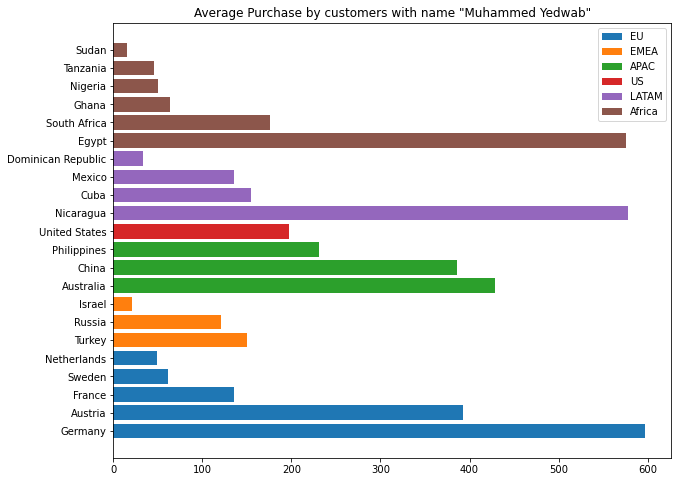

In [35]:
plt.figure(figsize = (10,8))

plt.barh(mkt_EU.index, mkt_EU['Sales'], label='EU')
plt.barh(mkt_EMEA.index, mkt_EMEA['Sales'], label='EMEA')
plt.barh(mkt_APAC.index, mkt_APAC['Sales'], label='APAC')
plt.barh(mkt_US.index, mkt_US['Sales'], label='US')
plt.barh(mkt_LATAM.index, mkt_LATAM['Sales'], label='LATAM')
plt.barh(mkt_Africa.index, mkt_Africa['Sales'], label='Africa')
plt.title('Average Purchase by customers with name "Muhammed Yedwab"')
plt.legend()

***The single best customer (**Patrick**) to be rewarded is in:
  - EU: Germany
  - EMEA: Turkey
  - APAC: Australia
  - US: US
  - LATAM: Nicaragua
  - Africa: Egypt

**NB: Patrick (PO-18850) made no purchase from EMEA and Africa**

#### Graphing unique customer ( PO-18850 is by name Patrick O'Brill) in market and country 

In [36]:
# From the data table pick transactions with only 'Muhammed Yedwab'.
# Group the data by markets and countries. This helps to identify which market and country where 
#'Muhammed Yedwab' could be identified to give our gift or bonus to, Assuming the choice is based on
# customers with similar name

mkt_Patrick = data[data['Customer ID'] == 'PO-18850']
tb2 = mkt_Patrick.groupby(['Market', 'Country'], sort=False)[['Sales']].mean().sort_values('Sales',
                                                                               ascending = False)


In [37]:
tb2


Sales
Market Country                       
APAC   Australia           488.076000
LATAM  Colombia            456.960000
EU     Germany             422.663000
       France              406.903286
US     United States       339.719464
LATAM  Guatemala           328.600000
APAC   India               274.908000
LATAM  Honduras            226.476000
       Mexico              216.733333
EU     United Kingdom      187.520000
LATAM  Brazil              115.382667
EU     Italy               103.740000
LATAM  Dominican Republic   75.173333
EU     Spain                73.920000
       Sweden               64.822500
       Switzerland          59.700000
APAC   South Korea          44.137500
       New Zealand          40.674000

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))

total = tips.groupby('day')['total_bill'].sum().reset_index() 
# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

NameError: name 'tips' is not defined

<Figure size 1008x1008 with 0 Axes>

In [ ]:
# Create variables for each market (index) in which PO-18850 is located
# EMEA and Africa market has no 'PO-18850'  (Patrick). This can be proved with the code:
# data[data['Customer ID'] == 'EMEA'][['Market']]

mktt_EU = tb2.loc['EU']
#mktt_EMEA = tb2.loc['EMEA']
mktt_APAC = tb2.loc['APAC']
mktt_US = tb2.loc['US']
mktt_LATAM = tb2.loc['LATAM']
#mktt_Africa = tb2.loc['Africa']

In [ ]:
plt.figure(figsize = (10,8))

plt.barh(mktt_EU.index, mktt_EU['Sales'], label='EU')
plt.barh(mktt_APAC.index, mktt_APAC['Sales'], label='APAC')
plt.barh(mktt_US.index, mktt_US['Sales'], label='US')
plt.barh(mktt_LATAM.index, mktt_LATAM['Sales'], label='LATAM')
plt.title("Average Purchase by customer with a unique ID by name 'Patrick O'Brill'")
plt.legend()

***The single best customer (**Patrick**) to be rewarded is in:
  - EU: Germany
  - APAC: Australia
  - US: US
  - LATAM: Colombia

**NB: Patrick (PO-18850) made no purchase from EMEA and Africa**

### Analysis on individual columns except **Postal Code** 
 - (b) Shiping: **Ship Mode**, Shipping Cost, Ship Date, Ship Date_M, Ship Date_Y, Category, Quantity, Sales, Unit Price, Profit 

In [ ]:
# Add Unit Price to 'data'


for iddx in data.columns:
    if iddx == 'Unit Price':
        data = data
    else:
        data['Unit Price'] = data['Sales']/data['Quantity']

In [ ]:
ship_data = data[['Ship Date', 'Ship Date_M', 'Ship Date_Y','Ship Mode', 'Category','Market', 'Country', 'Shipping Cost', 
                  'Sales', 'Profit', 'Unit Price', 'Quantity']]


In [ ]:
ship_data

In [ ]:
#Taking Shipping Mode

individual_summary_col (object, 'top', 'Ship Mode') # A self defined function taking 3 arguments 
                                                        # Can be used to identify highest element in a
                                                        # column. It's being used to identified 
                                                        # frequently used mode


In [ ]:
ship_modes = ship_data[['Ship Mode','Ship Date']].groupby('Ship Mode').count()#.sort_values('Ship Date',
                            # ascending = False)

In [ ]:
ship_modes

In [ ]:
plt.bar(ship_modes.index, ship_modes['Ship Date'])
plt.xlabel('Shipping Mode')
plt.ylabel('Frequency of trip')
plt.title('The Highest and Lowest Ship Modes used (2011-2014)')
plt.show

**Standard Class** was used often from 2011 to 2014 to ship goods to customers. AND 
**Same Day** was less used

Questions: 
- Which product category were used for both **Standard Class** - Often used, and **Same Day - less used**?
- Which markets were these modes used to ship the products
- In Which markets were highest average shipping cost incurred using these two modes (**Standard Class** and **Same Day**)?
- In Which markets were highest average quantities of products sent to through these modes (**Standard Class** and **Same Day**)?
- In Which markets were highest average sales generated using these two modes (**Standard Class** and **Same Day**)?

In [ ]:
ship_data['shipping cost perUnit'] = ship_data['Shipping Cost']/ship_data['Quantity']
ship_data.head(3)

In [ ]:
# This function helps to assess 'Standard Class' AND 'Same Day' 'Ship Mode' in categorical variables
# Such as Market, product category, country, etc.
# column_1: categorical variable upon which 'Ship Mode' is being assessed, 
# column_2: could be discret variable (use .mean) or categorical (use .count()) 
# column_2 is the value used to measure column 1
ship_data_group = ship_data.copy()

def ship_mod_cols (column_1, column_2):
    if type(ship_data_group[[column_2]].iloc[0,0]) is str:

        tb3 = ship_data_group.groupby(['Ship Mode', column_1], sort=False)[[column_2
                            ]].count().sort_values(column_2,ascending = False)

    else: 
        tb3 = ship_data_group.groupby(['Ship Mode', column_1], sort=False)[[column_2
                                ]].mean().sort_values(column_2,ascending = False)
    
    mode_std = tb3.loc['Standard Class']
    mode_same = tb3.loc['Same Day']

    #plt.figure(figsize = (10,8))
    if (mode_same[column_2].sum() > mode_std[column_2].sum()).sum() > 0:
        plt.bar(mode_same.index, mode_same[column_2], label='Same Day', color = 'orange')
        plt.bar(mode_std.index, mode_std[column_2], label='Standard Class', color = 'green')
    elif (mode_same[column_2].sum() < mode_std[column_2].sum()).sum() > 0:
        plt.bar(mode_std.index, mode_std[column_2], label='Standard Class', color = 'green')
        plt.bar(mode_same.index, mode_same[column_2], label='Same Day', color = 'orange')
    
#     else:
#         plt.bar(mode_std.index, mode_std[column_2], label='Standard Class', color = 'green')
#         plt.bar(mode_same.index, mode_same[column_2], label='Same Day', color = 'orange')
    
    


    plt.legend()


In [ ]:
ship_mod_cols ('Category', 'Ship Date_M') # Assessing 'Standard Class' AND 'Same Day' in Product 
                                          # Categories
                                          # 'Ship Date_M' is chosen to enable us count our categorical
                                          # variable in the first parameter

- The product category with **Standard Class** as the highest mode of shipment is **Office Supplies**.
- The product category with **Same Day** as the lowest mode of shipment is **Furniture**

In [ ]:
ship_mod_cols ('Market', 'Ship Date_M') # Assessing 'Standard Class' AND 'Same Day' in Markets 
                                        # 'Ship Date_M' is chosen to enable us count our categorical
                                        # variable in the first parameter
                                        

- The Market with **Standard Class** as the highest mode of shipment is **APAC**.
- The Market with **Same Day** as the lowest mode of shipment is **Canada**

In [ ]:
ship_mod_cols ('Market', 'Shipping Cost')  # 

In [ ]:
##### Using correlation to determine the relationship between shipping cost and Sales

ship_data[['Shipping Cost', 'Sales']].corr()

- **Same Day** incurs more shipping cost in all markets than **Standard Class**. Cost in **Same Day** mode is twice the cost in **Standard Class** mode in every market.
- Both **Same Day** and **Standard Class** mode incurred their highest average shipping cost in **APAC** market
- Both **Same Day** and **Standard Class** mode incurred their lowest average shipping cost in **Canada**
- Because **Same Day** is not being used often from 2011 to 2014, the company is on the track of reducing its shipment cost since it costs the company more than the **Standard Class**. 
- Because of the strong positive correlation between Shipping Cost and Sales, any effort such as reducing **Same Day** in order to reduce cost can have serious negative impact on sales. This means that sales in Canada is likely to be lower than that in APAC since it had the lowest use of **Same Day**. 


In [ ]:
## Quantity of product categories transported to different markets
#using different modes

tb4 = ship_data.pivot_table(index = 'Market',values = 'Quantity',columns = 'Category',
                            aggfunc='sum',margins =True,margins_name ='Total')

tb4.sort_values('Total')

- Office supplies was the highest product category sold
- The least sold product is Furniture. This is due to their nature, unlike frequently used products by customers
- Effort should be put in place to increase the quantity of products sold in Canada and Africa

In [ ]:
## Shipping cost incurred in using different mode to transport quantity of products 
#to different markets

tb5 = ship_data.pivot_table(index = 'Market',values = 'shipping cost perUnit',columns = 'Ship Mode',
                            aggfunc='sum',margins =True,margins_name ='Total')

tb5#.sort_values('Total',)

**INCREASING PROFIT:**
- Shipping cost in APAC should be reduced by using more Same Day shipping mode which has lowest shipping cost. Besides, Same Day shipping mode has the possibility of increasing sales revenue due to its ability to increase customer fill rate.

### Analysis on individual columns except **Postal Code** 
 - (b) Geographical area: **Segment**, **City**, **State**, **Country**, **Market**, **Region**, Shipping Cost, 'Product Name', Category, Quantity, Sales, Unit Price, Profit 

In [42]:
geo_data = data[['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Product Name', 'Customer ID', 'Sales']]

geo_data.describe(include='all')

,Segment,City,State,Country,Market,Region,Category,Product Name,Customer ID,Sales
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000
unique,3,3636,1094,147,7,13,3,3788,1590,NaN
top,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Staples,PO-18850,NaN
freq,26518,915,2001,9994,11002,11117,31273,227,97,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.490581
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.565361
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.758625
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.053000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.053200


In [43]:
trying = geo_data.copy()
trying[['Segment', 'Country']][trying['Country']=='Zimbabwe'].drop_duplicates(subset="Segment")
 

,Segment,Country
3013,Corporate,Zimbabwe
3328,Consumer,Zimbabwe
11582,Home Office,Zimbabwe


- New York City and Califonia are the city and State in the United States most frequently transacted  


In [44]:
#This function defines and returns the countries with the highest number of Cities, States, Markets,Categories, Regions
#Customers, and Products being sold).
# col: specifies the column - area of comparison ((City, State, Market, Region, Category, Product Name))
# level specifies whether we need 'top' country or 'last' country in terms of ity, State, Market,or Region with most 
# transaction

def best_countries_in (col):
    location = geo_data.copy()
    # location_unique_col = location.groupby ('Country').drop_duplicates(subset = [col])
    location_group = location.groupby('Country')
    
    countries = {}
    for country, cols in location_group: 
        num_in_columns = len(cols[[col]].drop_duplicates())
        v = {country: num_in_columns}
        countries.update(v)
    if col == 'State':
        col = 'Number of States'
    elif  col == 'Category':
        col = 'Categories'
    elif col == 'Market':
        col = 'Number of Markets'
    elif col == 'Customer ID':
        col = 'Number of customers'
    elif col == 'Product Name':
        col = 'Products Sold'    
    
    output_data = np.array(sorted (countries.items()))
    output_df = pd.DataFrame(output_data, columns = 
                    ['Country',col]).set_index('Country').sort_values(col, ascending=False)  
    

    
    return output_df

# def func (col):

#     df = best_countries_in (col)
#     for col in ['City', 'State', 'Market', 'Region', 'Category', 'Product Name']:
         
#         df = pd.merge(df, best_countries_in (col))
       
    
#     return df



In [46]:
cat_highest = cat_highest[cat_highest['Categories'] > '1']#best_countries_in('Category')


NameError: name 'cat_highest' is not defined

In [47]:
states_highest = best_countries_in('State')


In [48]:
customers_highest = best_countries_in('Customer ID').head(30)

In [49]:
product_highest = best_countries_in('Product Name')


- **United States tops the number of transactions in term of Segment, City, State, Market, and Region**
- **Chad is the least transacted country interms of City, State, Market and Region** 

### b) i.  Analysing other variables (financial variables):  Shipping Cost, Category, Quantity, Sales, Unit Price, Profit on the Geographical variables: Segment, City, State, Country, Market, Region

##### (a)Distribution Product Category

In [50]:
#UNIT PRICE

geo_data_others  = data[['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Unit Cost', 
                        'Category', 'Quantity', 'Sales', 'Unit Price', 'Profit']]

def other_var_geo (location):
    geo_data_others[location,'Unit Cost','Quantity', 'Sales', 'Unit Price', 'Profit']
    
    



KeyError: "['Unit Price'] not in index"

In [ ]:
sns.distplot(geo_data_others['Unit Cost'])

In [ ]:
# unit_price_cat (Column name'sub Category', 'variable：cost, profit, sales')

def cost_sales_prof_dist (column, sub, var):

    ttd = geo_data_others[geo_data_others[[var, column]][column]==sub]
    
    
    sns.distplot(ttd[var])     
    print(sub,'  max ', var, ':' , max(ttd[var]), 'min ', var,': ', min(ttd[var]), 
          'mean ', var, ': ', ttd[var].mean())
    
    
 

In [ ]:
data.to_csv('C:/Users/hp/Documents/Blossom Academy/Trying_Data/data_sales.csv')

#C:\Users\hp\Documents\Blossom Academy\Trying_Data

#### Distribution in Product Category (Technology, Furniture, Office Supplies)
Cost, unit price, profit, sales

In [ ]:
# Select only Top and Last Market in terms of Cost, Unit Price, Profit and Sales

dta = data[['Category', 'Cost', 'Unit Price', 'Profit', 'Sales']].groupby('Category').mean()
#dta.sort_values('Sales')
dta

In [ ]:
dta.index

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:

#cost_sales_prof_dist('Category', 'Technology', 'Unit Cost') # Unit Cost

In [ ]:
#cost_sales_prof_dist('Category', 'Furniture', 'Unit Cost') # Unit Cost

In [ ]:
#cost_sales_prof_dist('Category', 'Office Supplies', 'Unit Cost') # Unit Cost

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
#cost_sales_prof_dist('Category', 'Technology', 'Unit Price') # Unit Price 

In [ ]:
#cost_sales_prof_dist('Category', 'Furniture', 'Unit Price') # Unit Price 

In [ ]:
#cost_sales_prof_dist('Category', 'Office Supplies', 'Unit Price') # Unit Price 

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
#cost_sales_prof_dist('Category', 'Technology', 'Sales') # Sales

In [ ]:
#cost_sales_prof_dist('Category', 'Furniture', 'Sales') # Sales

In [ ]:
#cost_sales_prof_dist('Category', 'Office Supplies', 'Sales') # Sales

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
#cost_sales_prof_dist('Category', 'Technology', 'Profit') # Profit

In [ ]:
#cost_sales_prof_dist('Category', 'Furniture', 'Profit') # Profit

In [ ]:
#cost_sales_prof_dist('Category', 'Office Supplies', 'Profit') # Profit

#### Distribution in Market (APAC, Africa, Canada, EMEA, EU, LATAM, US) 
Cost, unit price, profit, sales

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
# Select only Top and Last Market in terms of Cost, Unit Price, Profit and Sales

dta = data[['Market', 'Cost', 'Profit', 'Sales']].groupby('Market').mean()
dta.sort_values('Sales')

COST:
- Highest Cost: APAC 
- Lowest Cost:Canada, Africa

Profit:
- Highest Profit: Canada
- Lowest Profit:EMEA

Sales:
- Highest Sales: APAC
- Lowest Sales:EMEA

In [ ]:
cat_mkt = data[['Market', 'Category', 'Cost', 'Profit', 'Sales']]

In [ ]:
# Changing the index
cat_mkt.index = np.arange(1,len(cat_mkt)+1)
cat_mkt.head()

In [ ]:
cat_mkt_cost = cat_mkt.pivot_table(index = 'Market',values = 'Cost',columns = 'Category',aggfunc='mean')
cat_mkt_sal = cat_mkt.pivot_table(index = 'Market',values = 'Sales',columns = 'Category',aggfunc='mean')
cat_mkt_prof = cat_mkt.pivot_table(index = 'Market',values = 'Profit',columns = 'Category',aggfunc='mean')

In [ ]:
def my_ploting(val,title):
    width = 0.25
    ticks_1 = np.arange(len(val.index))
    ticks_2 = [i+width for i in ticks_1]
    ticks_3 = [i+width for i in ticks_2]
    plt.figure(figsize = (10,6))
    plt_1=plt.bar(ticks_1,val['Furniture'].values,width = width,color='#168028',label = 'Furniture')
    plt_2=plt.bar(ticks_2,val['Office Supplies'].values,width = width,color = '#FF0000',label = 'Office Supplies',)
    plt_3=plt.bar(ticks_3,val['Technology'].values,width = width,color = '#002840',label = 'Technology',)
    plt.xticks(ticks_1+width,val.index,rotation = 45,fontsize = '16')

    def value_label(plot):
        """Attach a text label above each bar in plot, displaying its height."""
        for bar in plot:
            height = round(bar.get_height())
            plt.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color ='black')
    

    value_label(plt_1)
    value_label(plt_2)
    value_label(plt_3)
    plt.title(title)
    plt.legend()
    plt.show()
    

In [ ]:
print(my_ploting(cat_mkt_cost,'Average Cost of Product Category in Different Markets'))
print(my_ploting(cat_mkt_sal, 'Average Sales of Product Category in Different Markets'))
print(my_ploting(cat_mkt_prof, 'Average Profit of Product Category in Different Markets'))


In [ ]:
# Correlation Among Sales, Cost, discount and Profit

cor_data = data[['Cost','Sales', 'Discount', 'Profit', ]]
cor  = cor_data.corr()
cor
cor1 = cor_data[cor_data['Discount']>0]
cor1

In [ ]:
plt.figure(figsize = [10, 4])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
#print('zero discount included')
sns.heatmap(cor,annot = True, cmap='jet') #zero discount included
plt.xlabel('zero discount included')

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
#print('zero discount excluded')
sns.heatmap(cor1,annot = True, cmap='jet') #only nonzero discount
plt.xlabel('zero discount excluded')


plt.show()

In [ ]:

sns.pairplot(cor_data)
plt.show()

In [ ]:
#When discount is nonzero
sns.pairplot(disc_data)
plt.show()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
#Contribution of cost to 

In [ ]:
## Unit shipping costs in transporting products to different market through different mode from 2011-2014

tb6 = tb5.copy()
tb6['First Class'] = tb5['First Class']/tb4['First Class']
tb6['Same Day'] = tb5['Same Day']/tb4['Same Day']
tb6['Second Class'] = tb5['Second Class']/tb4['Second Class']
tb6['Standard Class'] = tb5['Standard Class']/tb4['Standard Class']
#tb6['Total'] = tb6[['Canada','APAC']].sum()


In [ ]:
# Percentage contribution of each mode of shipment to quantities of items shiped to different markets

tb = tb6.copy()
tb['First Class'] = tb6['First Class']/tb6['Total'] * 100
tb['Same Day'] = tb6['Same Day']/tb6['Total'] * 100
tb['Second Class'] = tb5['Second Class']/tb5['Total'] * 100
tb['Standard Class'] = tb6['Standard Class']/tb6['Total'] * 100


tb

### SALES AND PROFIT
- treemap showing sales in different country
- Sales partterns 
- Sales of catogory in different markets


In [ ]:
sal = data[['Order Date_Y', 'Order Date_M', 'Region', 'Sales', 'Profit']]
sal_reg = sal[['Region', 'Sales']].groupby('Region').mean().sort_values('Sales', ascending = False)
prof_reg = sal[['Region', 'Profit']].groupby('Region').mean().sort_values('Profit', ascending = False)

In [ ]:
#To show values on barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
plt.figure(figsize = [20, 5])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
p = sns.barplot(x=sal_reg["Sales"], y=sal_reg.index, data=sal_reg, color="blue", saturation=.5)
#show values on barplot
show_values(p, "h", space=0)
plt.title('Average Sales in Regions (2011-2014)')

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
p = sns.barplot(x=prof_reg["Profit"], y=prof_reg.index, data=prof_reg, color="salmon", saturation=.5)
#show values on barplot
show_values(p, "h", space=0)
plt.title('Average Profit in Regions (2011-2014)')

plt.show()


###### Taking the last 3 countries where sales is low

In [ ]:
cd = sal[sal['Region']=='Canada']
af = sal[sal['Region']=='Africal']
em = sal[sal['Region']=='EMEA']

#or 'Africa' or 'EMEA'

In [ ]:
tb5 = cd.groupby(['Order Date_Y', 'Order Date_M'], sort=False)[['Sales']].mean()

y_2011 = tb5.loc[2011]
y_2012 = tb5.loc[2012]
y_2013 = tb5.loc[2013]
y_2014 = tb5.loc[2014]



plt.figure(figsize = [6, 3])


fig, ax = plt.subplots(2, 1)

ax[0].plot(y_2011.index, y_2011['Sales'], label='2011')

ax[1].plot(y_2012.index, y_2012['Sales'], label='2012')

# plt.plot(y_2012.index, y_2012['Sales'], label='2013')
# plt.plot(y_2014.index, y_2014['Sales'], label='2014')
plt.title("Average Sales")
plt.xticks(rotation = 30)
plt.legend()

In [ ]:
data.head(1)


### Analysis on General Sales

In [ ]:
sales_2011 = data[data['Order Date_Y']==2011][['Sales']]
sales_2012 = data[data['Order Date_Y']==2011][['Sales']]
sales_2013 = data[data['Order Date_Y']==2011][['Sales']]
sales_2014 = data[data['Order Date_Y']==2011][['Sales']]

#Rename columns
sales_2011.rename(columns={'Sales', 'Sales_2011'}, inplace=True)
sales_2011

In [ ]:
cat_mkt_sal = cd.pivot_table(index = 'Region',values = 'Sales',columns = 'Category',aggfunc='mean')


In [ ]:
general_sales = data.groupby(['Market', 'Country'], sort=False)[['Sales']]\
.mean().sort_values('Sales',ascending=False)


In [ ]:
def sales_graph (mkt):
    plt.figure(figsize=(6,10))

    Canada = general_sales.loc['Canada']
    Africa = general_sales.loc['Africa']
    EMEA = general_sales.loc['EMEA']
    EU = general_sales.loc['EU']
    US = general_sales.loc['US']
    LATAM = general_sales.loc['LATAM']
    APAC = general_sales.loc['APAC']
    America = pd.concat([Canada, US])
    #plt.figure(figsize = (10,8))
    #fig, ax = pltisubplots(2,1)
    
    if mkt ==  'Canada':
        plt.barh(Canada.index, Canada['Sales'], label='Canada')
    elif mkt == 'Africa':
        plt.barh(Africa.index, Africa['Sales'], label='Africa', color = 'green')
    elif mkt == 'EMEA':
        plt.barh(EMEA.index, EMEA['Sales'], label='EMEA', color = 'purple')
    elif mkt == 'EU':
        plt.barh(EU.index, EU['Sales'], label='EU', color = 'brown')
    elif mkt == 'US':
        plt.barh(US.index, US['Sales'], label='US', color = 'pink')
    elif mkt == 'LATAM':
        plt.barh(LATAM.index, LATAM['Sales'], label='LATAM', color = 'black')
    elif mkt == 'APAC':
        plt.barh(APAC.index, APAC['Sales'], label='APAC')   
    elif mkt ==  'America':
            plt.bar(America.index, America['Sales'], label='America')    
    
#     plt.legend()


#### 1. Sales in Africa

In [ ]:
sales_graph('Africa')

#### 2. Sales in EMEA

In [ ]:
sales_graph('EMEA')

#### 3. Sales in EU

In [ ]:
sales_graph('EU')

#### 4. Sales in LATAM

In [ ]:
sales_graph('LATAM')

#### 5. Sales in APAC

In [ ]:
sales_graph('APAC')

#### 6. Sales in America

In [ ]:
sales_graph('America')